## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
data = np.genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [4]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
m = data.shape[0]
n = data.shape[1]

X = np.block([np.ones((m,1)), data[:, 0].reshape(m,1)])

In [6]:
y = data[:, 1].reshape(m,1)


#### Explore your data

In [7]:
X

array([[1.        , 2.9000001 ],
       [1.        , 6.69999981],
       [1.        , 4.9000001 ],
       [1.        , 7.9000001 ],
       [1.        , 9.80000019],
       [1.        , 6.9000001 ],
       [1.        , 6.0999999 ],
       [1.        , 6.19999981],
       [1.        , 6.        ],
       [1.        , 5.0999999 ],
       [1.        , 4.69999981],
       [1.        , 4.4000001 ],
       [1.        , 5.80000019]])

In [8]:
y

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

#### Plot the original data (scatter plot of X,y)

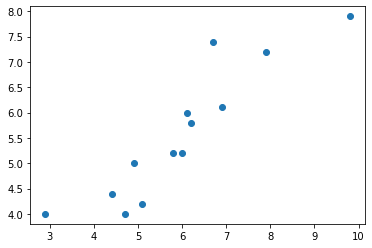

In [9]:
plt.scatter(data[:,0], data[:, 1])

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

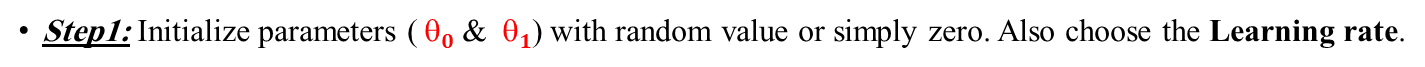

In [10]:
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.]])

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.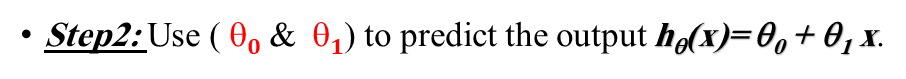
#### Note: you will need to iterate through all data points

In [11]:
h = X @ theta

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).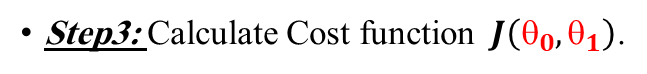
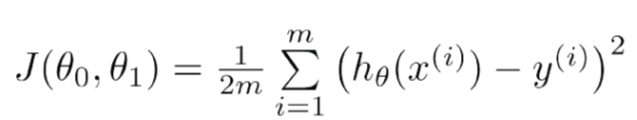

In [12]:
def compute_cost(X, y, theta):
    diff = (X @ theta) - y
    return (diff.T @ diff)/(2*m)

In [13]:
compute_cost(X, y, theta)

array([[16.30538448]])

### Step4: Calculate the gradient.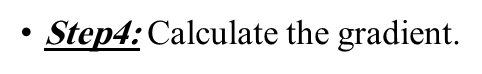
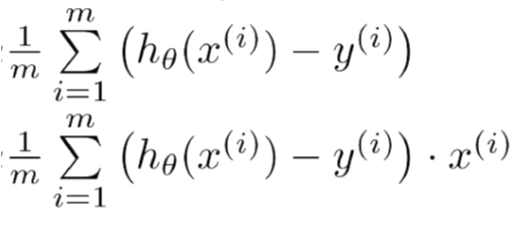

### Step5: Update the parameters (simultaneously).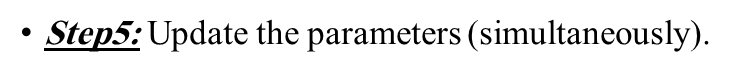
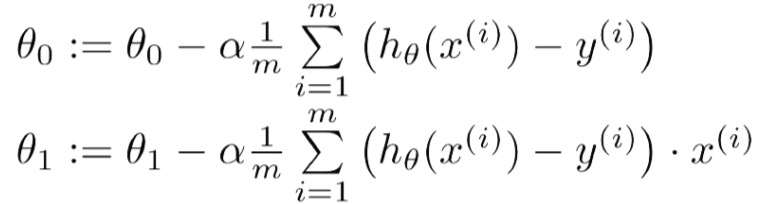

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.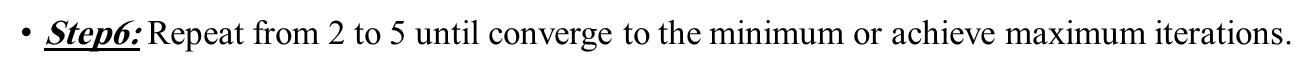

In [57]:
def gradient_descent(X, y, theta, alpha, iters):

    costs = [0]
    thetas = np.zeros((iters, n))
    
    # contains all grads
    grads = np.zeros(iters+1)
    
    # set first element to zero for comparison reasons
    grads[0] = 0

    for i in range(iters):
        # differnce between Actual and predicted
        diff = (X @ theta) - y
        
        # grad of cost fn 
        grad = (X.T @ diff) / m
        
        # append current grad norm for stopping condition
        grads[i+1] = np.linalg.norm(grad)
        
        # update thetas
        theta = theta - (alpha*grad)
        
        # save current theta
        thetas[[i], :] = theta.T
        
        # compute cost on the new thetas
        
        costs.append(compute_cost(X, y, theta)[0,0])
        
        if np.abs(costs[i+1] - costs[i]) < 0.00001:
            iters = i
            break
#         print(grads[i+1] - grads[i])
        if np.abs(grads[i+1] - grads[i]) < 0.0001:
            iters = i
            break
            
#          cost[1:iters+2]
    return theta, costs[1:], thetas[:iters+1,:], iters
    


In [15]:
alpha = 0.01
iters = 100
theta = np.zeros((n,1))
theta, cost, thetas, iters = gradient_descent(X, y, theta, alpha, iters)
cost

[6.175608808043304,
 2.417830065479564,
 1.023798104945009,
 0.5066182835290438,
 0.3147143277319524,
 0.2434743055438609,
 0.21699567226372102,
 0.20712173024297784,
 0.20340751178872757,
 0.2019783667831467,
 0.20139696055681952,
 0.2011301014330744,
 0.20097999730449675,
 0.20087327540003713,
 0.20078271736477762,
 0.20069822621899538,
 0.20061605630353427,
 0.20053481803601236,
 0.20045399584099605,
 0.20037339836353346,
 0.20029295452116636]

In [17]:
print("No of iterations: ", iters)
print('Thetas: ', theta)

No of iterations:  20
Thetas:  [[0.15889541]
 [0.89381142]]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [19]:
h = X@theta
print('H: ', h)

H:  [[2.75094862]
 [6.14743177]
 [4.53857147]
 [7.22000574]
 [8.91824753]
 [6.32619431]
 [5.61114501]
 [5.70052606]
 [5.52176395]
 [4.71733358]
 [4.35980893]
 [4.09166576]
 [5.34300184]]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

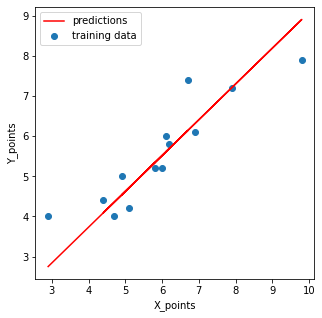

In [20]:
# x = np.linspace(0, 12, 100)
# f = theta[0, 0] + (theta[1,0] * X[:,1])
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1],f,'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=2)

#### Use R2 score to evaluate LR equation output
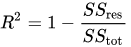
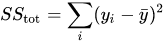
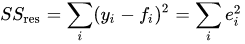
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [24]:
from sklearn.metrics import r2_score

In [25]:
# Actual y and predictions
r2_score(y, h)

0.7487604237450436

Text(0.5, 1.0, 'Cost vs Iters')

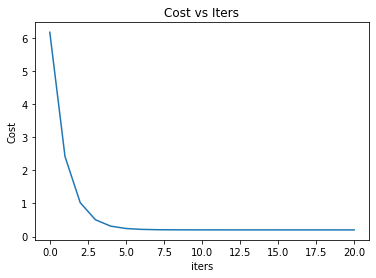

In [26]:
plt.plot(cost)
plt.xlabel('iters')
plt.ylabel("Cost")
plt.title("Cost vs Iters")

Text(0.5, 1.0, 'theta 0 vs Cost')

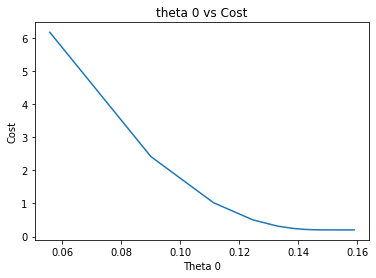

In [27]:
plt.plot(thetas[:,0], cost)
plt.xlabel('Theta 0')
plt.ylabel("Cost")
plt.title("theta 0 vs Cost")

Text(0.5, 1.0, 'theta 1 vs Cost')

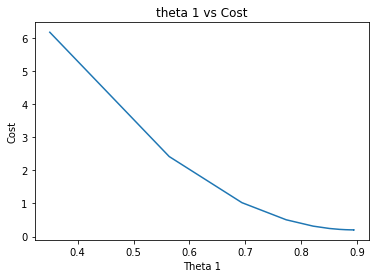

In [28]:
plt.plot(thetas[:,1], cost)
plt.xlabel('Theta 1')
plt.ylabel("Cost")
plt.title("theta 1 vs Cost")

Text(0.5, 1.0, 'ALL fitted lines')

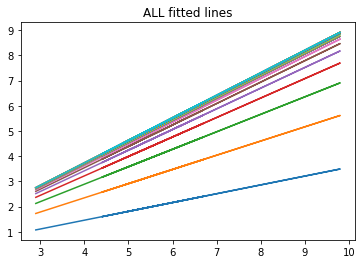

In [32]:
for i in range(iters):
#     x = np.linspace(0, 12, 100)
#     f = thetas[i,:][0] + (thetas[i,:][1]*X[:,1])
    f = X @ thetas[i, :].T
    plt.plot(X[:,1], f)

plt .title('ALL fitted lines')

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [83]:
data = np.genfromtxt('MultipleLR.csv', delimiter=',')

In [84]:
m = data.shape[0]
n = data.shape[1]

X = np.block([np.ones((m,1)), data[:,:-1]])

In [85]:
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [110]:
y = data[:,-1].reshape(m,1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [109]:
h = X@theta
print('h= ', h)

h=  [[153.83414385]
 [185.01165594]
 [182.22847437]
 [198.53537062]
 [141.06896588]
 [104.13337235]
 [148.68891823]
 [110.33485619]
 [173.02505307]
 [160.43895331]
 [143.21225405]
 [141.29066708]
 [188.1926716 ]
 [156.34409528]
 [149.39815248]
 [187.80374346]
 [148.84278624]
 [178.46132074]
 [179.3848579 ]
 [160.50757533]
 [174.35159612]
 [173.63122943]
 [166.19926124]
 [154.92785327]
 [191.6895404 ]]


In [99]:
alpha = 0.00001
iters = 300
theta = np.zeros((n,1))
theta, cost, thetas, iters = gradient_descent(X, y, theta, alpha, iters)
cost

[8668.481648916411,
 5605.887123892013,
 3626.0477276213815,
 2346.164144154076,
 1518.7726587864308,
 983.8983511273211,
 638.1241396672503,
 414.59521540367524,
 270.0927461907812,
 176.67756834060293,
 116.28818345470309,
 77.24858977294612,
 52.01074149671197,
 35.695143354522195,
 25.147406152168898,
 18.328349475478433,
 13.919728648347016,
 11.069353735031079,
 9.226319657149938,
 8.034489369807977,
 7.263635199060095,
 6.764924602439198,
 6.442143578721772,
 6.233093808363603,
 6.097566684434339,
 6.009569027623185,
 5.952297336809145,
 5.914888852682987,
 5.890321256541236,
 5.874054913579862,
 5.863155140086951,
 5.85572478596842,
 5.85053742313125,
 5.8468002171463835,
 5.844000633716558,
 5.841807340832502,
 5.840006146169998,
 5.838458583301942,
 5.837075139420019,
 5.835797948178911,
 5.834589601345383,
 5.833425915998187,
 5.832291258826161,
 5.831175523482668,
 5.8300721765721075,
 5.828976994461982,
 5.827887246684876,
 5.826801168042007,
 5.82571761734042,
 5.82463585

In [100]:
len(cost)

300

### Plot loss vs. iterations

Text(0.5, 1.0, 'Cost vs Iters')

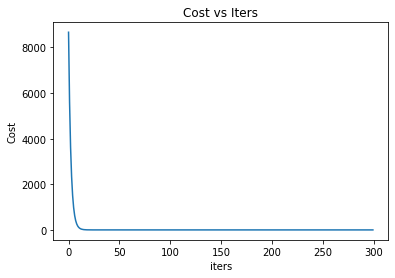

In [101]:
# plt.plot(np.arange(len(cost[1:])), cost[1:])
plt.plot(cost)
plt.xlabel('iters')
plt.ylabel("Cost")
plt.title("Cost vs Iters")

Text(0.5, 1.0, 'theta 0 vs Cost')

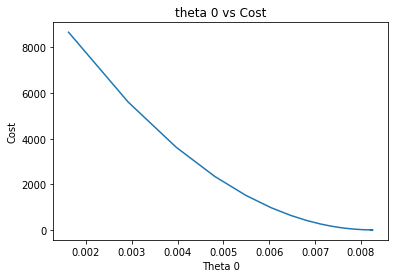

In [102]:
plt.plot(thetas[:,0], cost)
plt.xlabel('Theta 0')
plt.ylabel("Cost")
plt.title("theta 0 vs Cost")

Text(0.5, 1.0, 'theta 1 vs Cost')

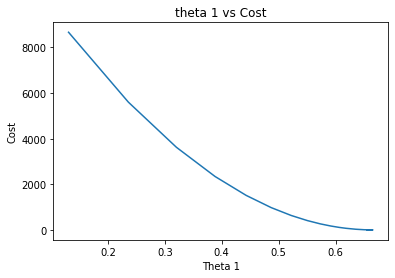

In [103]:
plt.plot(thetas[:,1], cost)
plt.xlabel('Theta 1')
plt.ylabel("Cost")
plt.title("theta 1 vs Cost")

Text(0.5, 1.0, 'theta 2 vs Cost')

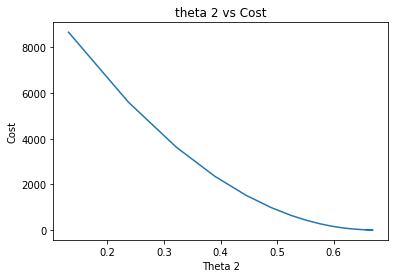

In [104]:
plt.plot(thetas[:,2], cost)
plt.xlabel('Theta 2')
plt.ylabel("Cost")
plt.title("theta 2 vs Cost")

Text(0.5, 1.0, 'theta 3 vs Cost')

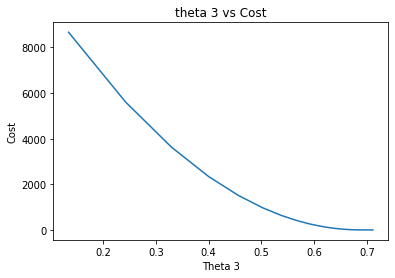

In [105]:
plt.plot(thetas[:,3], cost)
plt.xlabel('Theta 3')
plt.ylabel("Cost")
plt.title("theta 3 vs Cost")

#### Use R2 score to evaluate LR equation output

In [107]:
from sklearn.metrics import r2_score

In [108]:
r2_score(y, X @ theta)

0.9799344359190973

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
data = np.genfromtxt('RegData.csv', delimiter=',')
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [70]:
m = data.shape[0]
n = data.shape[1]

# X = np.block([np.ones((m,1)), data[:, 0].reshape(m,1)])
X = data[:,0].reshape((m,1))
X

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

In [71]:
y = data[:, 1].reshape(m,1)
y

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

#### Train the model (fit the model to the training data)

In [72]:
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.coef_)
print(theta)

[[0.69452919]]
[[0.00821035]
 [0.65547882]
 [0.65770531]
 [0.71146074]]


#### Predict y values using the trained model

In [73]:
y_pred = regressor.predict(X)
y_pred

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

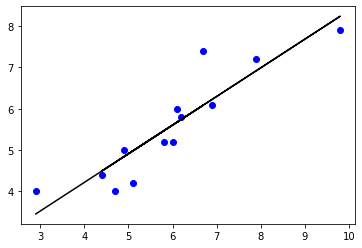

In [74]:
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')


#### Use R2 score to evaluate model output

In [75]:
print(regressor.score(X, y))

0.8213156778363777


### Repeat for Mulivariate

In [76]:
data = np.genfromtxt('MultipleLR.csv', delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [77]:
m = data.shape[0]
n = data.shape[1]

X = data[:,:-1]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [78]:
y = data[:,-1].reshape(m,1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [79]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [80]:
y_pred = regressor.predict(X)
y_pred

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

In [81]:
print(regressor.score(X, y))

0.9896615789448399
